# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from ppn2v.unet import UNet

from ppn2v.pn2v import utils
from ppn2v.pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Convallaria` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch = 10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.30190120339393617+-(2SEM)0.06088490151010103      
Epoch 1 finished      
avg. loss: 0.15198636408895255+-(2SEM)0.04228392561681386      
Epoch 2 finished      
avg. loss: 0.13911308385431767+-(2SEM)0.03788838548750609      
Epoch 3 finished      
avg. loss: 0.1448094379156828+-(2SEM)0.03688778754695704      
Epoch 4 finished      
avg. loss: 0.11557313837110997+-(2SEM)0.03126530784325994      
Epoch 5 finished      
avg. loss: 0.13682908993214368+-(2SEM)0.032985558502086634      
Epoch 6 finished      
avg. loss: 0.11742817591875791+-(2SEM)0.03433759142870483      
Epoch 7 finished      
avg. loss: 0.1073127344250679+-(2SEM)0.018114908114839807      
Epoch 8 finished      
avg. loss: 0.12161319861188531+-(2SEM)0.023453502851822027      
Epoch 9 finished      
avg. loss: 0.12783129829913378+-(2SEM)0.034122618869742334      
Epoch 10 finished      
avg. loss: 0.1291915912181139+-(2SEM)0.031502074522512136      
Epoch 11 finished      
avg. loss: 0.122

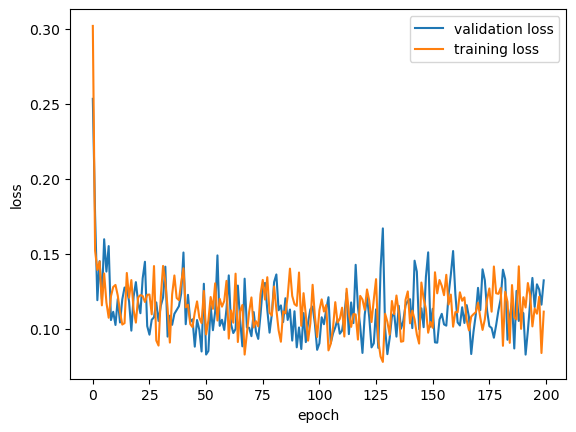

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()